In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

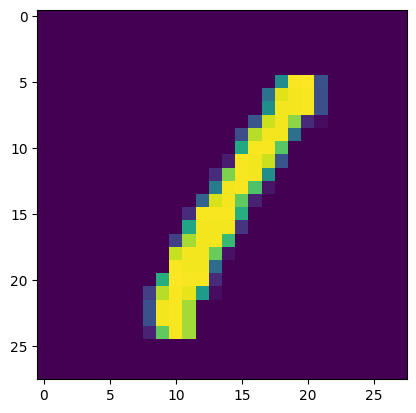

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3])

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2 )

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8596 - loss: 0.4780 - val_accuracy: 0.9565 - val_loss: 0.1475
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9621 - loss: 0.1265 - val_accuracy: 0.9679 - val_loss: 0.1104
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9756 - loss: 0.0790 - val_accuracy: 0.9686 - val_loss: 0.1056
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9823 - loss: 0.0579 - val_accuracy: 0.9710 - val_loss: 0.1000
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9859 - loss: 0.0466 - val_accuracy: 0.9703 - val_loss: 0.1053
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9889 - loss: 0.0355 - val_accuracy: 0.9733 - val_loss: 0.0941
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9913 - loss: 0.0279 - val_accuracy: 0.9738 - val_loss: 0.1016
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9923 - loss: 0.0230 - 

In [10]:
y_prob=model.predict(X_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[5.8028408e-13, 4.8800731e-13, 2.2186733e-11, ..., 9.9999988e-01,
        2.2448528e-14, 7.9854412e-10],
       [4.7808233e-24, 2.7719696e-11, 1.0000000e+00, ..., 1.9339958e-22,
        4.2851324e-21, 3.0448087e-22],
       [3.0593467e-10, 9.9992394e-01, 4.2282463e-05, ..., 1.3828607e-07,
        3.3683362e-05, 2.6540469e-08],
       ...,
       [1.2411268e-21, 1.0478782e-17, 4.9712508e-24, ..., 2.8178844e-18,
        5.3651866e-16, 1.6747241e-14],
       [2.8237032e-20, 1.6074984e-28, 1.0926569e-29, ..., 1.0820819e-25,
        1.5142155e-12, 1.1168041e-20],
       [7.8146945e-18, 5.9450946e-22, 3.3128367e-20, ..., 6.7635028e-23,
        2.0194807e-20, 5.5999830e-22]], dtype=float32)

In [11]:
y_pred=y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9764

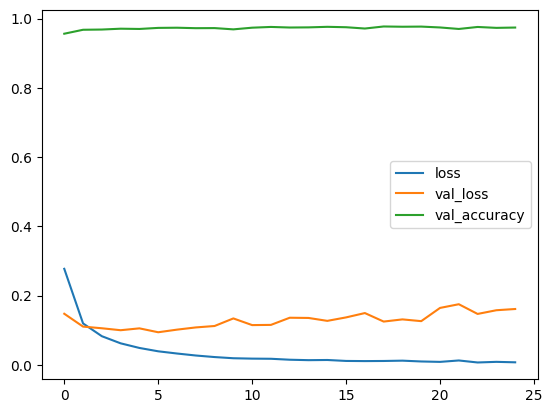

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','val_loss','val_accuracy'])

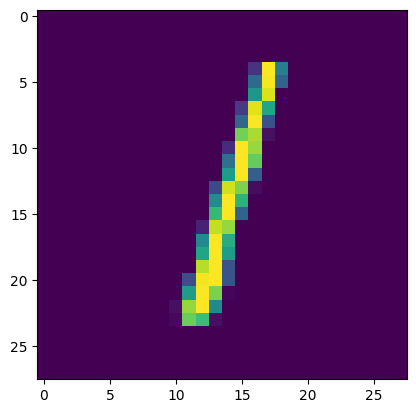

In [14]:
plt.imshow(X_test[2])

In [15]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([1], dtype=int64)